In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow.contrib.keras as keras
import sys
import utils

## Data Preprocessing

First, we load in our data set with the `utils` helpers that are provided along with the dataset that can be found [here](https://github.com/mdeff/fma).

In [3]:
tracks = utils.load('./fma_metadata/tracks.csv')
features = utils.load('./fma_metadata/features.csv')

/Users/rockzhou/workstation/ml/music_analysis/utils.py:37: FutureWarning: specifying 'categories' or 'ordered' in .astype() is deprecated; pass a CategoricalDtype instead
  'category', categories=SUBSETS, ordered=True)


Then, we filter down the tracks DataFrame to only the `track_id` and `genres`.

In [4]:
# dataframe with only track_id and genre ids
trackid_genres = tracks['track'].filter(['track_id', 'genres'])

# remove songs that don't have genres
trackid_genres = trackid_genres[trackid_genres['genres'].map(len) > 0]
# remove songs with a genre over 161 (why is this even a thing)
trackid_genres = trackid_genres[trackid_genres['genres'].map(max) < 161]

In [5]:
trackid_genres.shape

(63656, 1)

For simplicity, we only consider the first genre listed for each song.

In [6]:
# only take the first genre if a song has multiple genres
def getFirstGenre(genres):
    return genres[0]

reduceGenres = np.vectorize(getFirstGenre)
y_total_single = reduceGenres(trackid_genres.values)

Then, we convert our `y` vector into one hot encoding using `keras`:

In [7]:
y_total_onehot_single = keras.utils.to_categorical(y_total_single)
y_total_onehot_single.shape

(63656, 139)

**Using All Genres**

In [8]:
y_total_onehot_multiple = np.zeros((trackid_genres.shape[0], 161)) # m trials, n columns/output layer units
for i in range(trackid_genres.values.shape[0]):
    genres = trackid_genres.values[i][0]
    vector = np.zeros(161)
    for genre in genres:
        vector[genre-1] = 1
    
    y_total_onehot_multiple[i] = vector

In [9]:
print(y_total_onehot_multiple.shape)

(63656, 161)


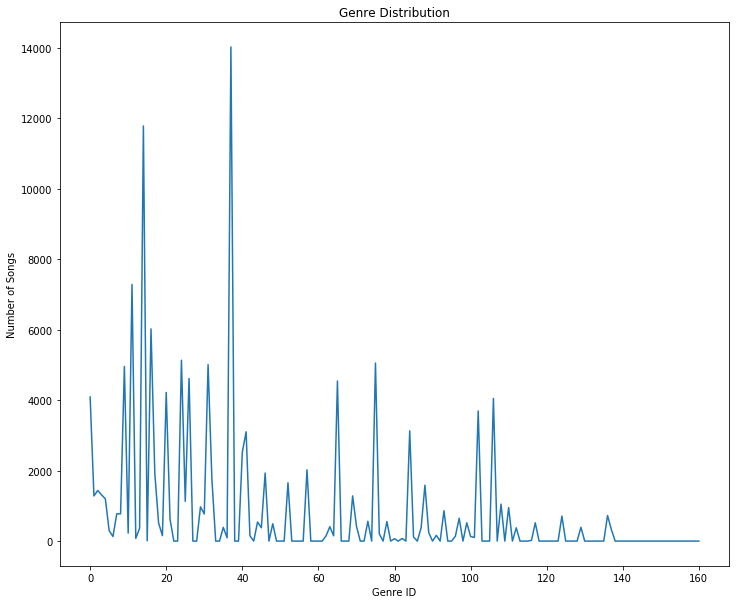

In [162]:
# distribution of genres
genre_distribution = np.sum(y_total_onehot_multiple, axis=0)

plt.plot(genre_distribution)
plt.ylabel('Number of Songs')
plt.xlabel('Genre ID')
plt.title('Genre Distribution')
plt.rcParams["figure.figsize"] = [12,12]
plt.show()

In [10]:
X_total = trackid_genres.merge(
    features,
    on='track_id',
    how='left'
).drop('genres', axis=1)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/pandas/core/reshape/merge.py:544: UserWarning: merging between different levels can give an unintended result (1 levels on the left, 3 on the right)
  warnings.warn(msg, UserWarning)


In [11]:
X_total.shape

(63656, 518)

Finally, we save our processed data as `csv` files on the filesystem.

In [12]:
# X_total.to_csv('X_musical_features.csv')

In [14]:
# pd.DataFrame(y_total_onehot_single).to_csv('y_genres_onehot_single.csv')

In [16]:
# pd.DataFrame(y_total_onehot_multiple).to_csv('y_genres_onehot_multiple.csv')

In [17]:
# trackid_genres.to_csv('y_genres_multiple.csv')

In [20]:
pd.DataFrame(y_total_single).to_csv('y_genres_single.csv', index=None)